<a href="https://colab.research.google.com/github/Alihassoon93/data-science-machine-learning/blob/main/Kfold_Explaination_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The goal of Kfoldd is to find the Optimal K then we use it to apply KNN

In [ ]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # split the data into x-trian,y-trian--x-test,y-test
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection # model selection is the cross validation function
# =============================================================================================

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# here we use one of our toy dataset in sake of simplcity

# Part I 
# ============================== data preprocessing ===========================================


# define column names
names = ['x', 'y', 'class']

# loading training data
df = pd.read_csv('/content/drive/My Drive/demo_data/3.concertriccir2.csv', header=None, names=names) # notice we include names here
print(df.head(10))

# create design matrix(data) X and target vector y
X = np.array(df.iloc[:, 0:4]) # end index is exclusive
y = np.array(df['class']) # showing you two ways of indexing a pandas df

          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0
5 -1.724979  3.463930    1.0
6  0.189573  1.699962    1.0
7 -0.334372  1.029284    0.0
8  3.098117 -2.681859    1.0
9 -1.240663 -1.227236    1.0


## Simple Cross Validation (without kfold)

In [ ]:
# model selection is the cross validation function

# split the data set into train(70%) and test(30%)
X_1, X_test, y_1, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0) # this randoms we can give it any number

# now we have 70% the training data
# split the train data set into cross validation train(49%) and cross validation test(21%)
X_tr, X_cv, y_tr, y_cv = model_selection.train_test_split(X_1, y_1, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30) with only odd value (1,3,5...,29)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train 
    pred = knn.predict(X_cv)

    # evaluate CV accuracy (what did knn.fit(X_tr, y_tr) predict on X_cv and what are the actual values which y_cv)
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc)) # this code means print all the Ks and their acc which are defined in (i)

# now we test it on our X and Y test (the unseen data to confirm the acc)   
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test) 
# now we compare the  pred with our Y-test to verify the acc
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))


CV accuracy for k = 1 is 100%

CV accuracy for k = 3 is 100%

CV accuracy for k = 5 is 100%

CV accuracy for k = 7 is 100%

CV accuracy for k = 9 is 100%

CV accuracy for k = 11 is 99%

CV accuracy for k = 13 is 94%

CV accuracy for k = 15 is 92%

CV accuracy for k = 17 is 91%

CV accuracy for k = 19 is 88%

CV accuracy for k = 21 is 83%

CV accuracy for k = 23 is 76%

CV accuracy for k = 25 is 71%

CV accuracy for k = 27 is 68%

CV accuracy for k = 29 is 66%

****Test accuracy for k = 1 is 99%


## 10 fold cross validation (with kfold)


The optimal number of neighbors is 1.


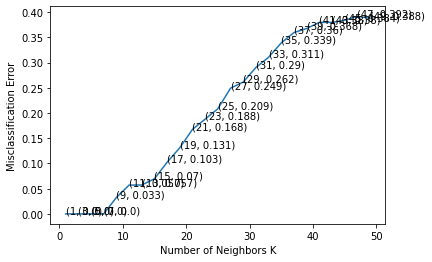

the misclassification error for each k value is :  [0.    0.    0.    0.    0.033 0.057 0.057 0.07  0.103 0.131 0.168 0.188
 0.209 0.249 0.262 0.29  0.311 0.339 0.36  0.368 0.38  0.38  0.384 0.392
 0.388]


In [ ]:
# creating odd list of K for KNN (1,3,5.....,49)
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    # use 10-kfold- cv on X_tr, y_tr with knn as my model & use accuracy metric 
    scores = cross_val_score(knn, X_tr, y_tr, cv=10, scoring='accuracy')
    # it returns me 10 kfold then we take the mean of them and append it to cv_scores 
    cv_scores.append(scores.mean())

# changing to misclassification error (ex. if acc = 90% , err = 10%)
MSE = [1 - x for x in cv_scores]

# determining best k (wich on of them has the lowest misclassification error)
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs for k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [ ]:
# ============================== KNN with k = optimal_k ===============================================
#npw on that optimal k we gonna trian our model

# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_tr, y_tr)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 1 is 99.333333%
